In [1]:
# Agenda
## What is the purpose of model evaluation, and what are some common evaluation procedures?
## What is the usage of classification accuracy, and what are its limitations?
## How does a confusion matrix describe the performance of a classifier?
## What metrics can be computed from a confusion matrix?
## How can you adjust classifier performance by changing the classification threshold?
## What is the purpose of an ROC curve?
## How does Area Under the Curve (AUC) differ from classification accuracy?

In [2]:
# Review of model evaluation
## Need a way to choose between models: different model types, tuning parameters, and features
## Use a model evaluation procedure to estimate how well a model will generalize to out-of-sample data
## Requires a model evaluation metric to quantify the model performance

In [3]:
#Model evaluation procedures
##Training and testing on the same data
##Rewards overly complex models that "overfit" the training data and won't necessarily generalize
#Train/test split
##Split the dataset into two pieces, so that the model can be trained and tested on different data
##Better estimate of out-of-sample performance, but still a "high variance" estimate
##Useful due to its speed, simplicity, and flexibility
# K-fold cross-validation
##Systematically create "K" train/test splits and average the results together
##Even better estimate of out-of-sample performance
##Runs "K" times slower than train/test spli

In [4]:
#Model evaluation metrics
##Regression problems: Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
##Classification problems: Classification accuracy

In [5]:
import pandas as pd

In [6]:
pd.options.display.max_rows = 999

# Classification accuracy

In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
# as the url is not working need to download the dataset from kaggle
col_names = ['pregnant','glucose',"bp","skin thickness",'insulin',"bmi",'pedigree','age',"label"]

In [8]:
pima = pd.read_csv(r"C:\Users\mynam\Downloads\diabetes.csv")

In [9]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
pima.shape

(768, 9)

In [10]:
feature_col = ['Pregnancies','Insulin','BMI','Age']
X = pima[feature_col]
Y = pima.Outcome

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train , X_test ,Y_train ,Y_test = train_test_split(X,Y,random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

In [15]:
y_pred = logreg.predict(X_test)

In [16]:
from sklearn import metrics

In [17]:
# Classification Accuracy

In [18]:
metrics.accuracy_score(Y_test,y_pred)

0.6770833333333334

# we should always check the classifiaction accuracy with null accuracy

In [19]:
# null accuracy: accuracy that could be achived by predicting the most frequent class 

In [20]:
Y_test.value_counts()
# examine the class distribution of the testing set (using a Pandas Series method)

0    130
1     62
Name: Outcome, dtype: int64

In [21]:
# calculate the percentage of ones
Y_test.mean()

0.3229166666666667

In [22]:
# calculate the percentage of zeros
1 - Y_test.mean()

0.6770833333333333

In [23]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(Y_test.mean(), 1 - Y_test.mean())

0.6770833333333333

In [24]:
# calculate null accuracy (for multi-class classification problems)
Y_test.value_counts().head(1) / len(Y_test)

0    0.677083
Name: Outcome, dtype: float64

In [25]:
#  Comparing the true and predicted response values

In [26]:
# print the first 25 true and predicted responses
print('True:', Y_test.values[0:25])
print('Pred:', y_pred[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [27]:
# Conclusion:
##Classification accuracy is the easiest classification metric to understand
##But, it does not tell you the underlying distribution of response values
##And, it does not tell you what "types" of errors your classifier is making

In [28]:
# this is the issue adressed by the confusion matrix 

In [29]:
# Confusion matrix
## Table that describes the performance of a classification model

In [30]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(Y_test, y_pred))
# if u did it in reverse order the matrix will be reversed and no error will be raised this is because the 
# matrics in the sklearn model ascpect that the first value is the true value  

[[114  16]
 [ 46  16]]


In [31]:
# in above the rows are representing the actual values [0] for 0  and [1] for 1
# the column are representing the predticting values [0]is for 0  and [1] is for 1

In [32]:
#very observation in the testing set is represented in exactly one box
#It's a 2x2 matrix because there are 2 response classes
#The format shown here is not universal

In [33]:
#Basic terminology

#True Positives (TP): we correctly predicted that they do have diabetes
#True Negatives (TN): we correctly predicted that they don't have diabetes
#False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")
#False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")

In [34]:
# print the first 25 true and predicted responses
print('True:', Y_test.values[0:25])
print('Pred:', y_pred[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [35]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(Y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [36]:
#it help us to understand how well the classifier performed but does not help in understandinig which 
# model is the best 
# however there are many matrix which can be calculaated from the confusion matrix and those can be used in
# the model selection procedure 

# Metrics computed from a confusion matrix

In [39]:
# Classification accuracy - how often our classifier correct ?
print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(Y_test, y_pred))

0.6770833333333334
0.6770833333333334


In [41]:
# Classification Error: Overall, how often is the classifier incorrect?
#Also known as "Misclassification Rate"
print((FP + FN) / (TP + TN + FP + FN))
print(1 - metrics.accuracy_score(Y_test, y_pred))

0.3229166666666667
0.32291666666666663


In [42]:
# Sensitivity: When the actual value is positive, how often is the prediction correct?

# How "sensitive" is the classifier to detecting positive instances?
# Also known as "True Positive Rate" or "Recall

print(TP / (TP + FN))
print(metrics.recall_score(Y_test, y_pred))

0.25806451612903225
0.25806451612903225


In [44]:
#Specificity: When the actual value is negative, how often is the prediction correct?

#How "specific" (or "selective") is the classifier in predicting positive instances?

print(TN / (TN + FP))

0.8769230769230769


In [45]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print(FP / (TN + FP))

0.12307692307692308


In [46]:
#Precision: When a positive value is predicted, how often is the prediction correct?

#How "precise" is the classifier when predicting positive instances?
print(TP / (TP + FP))
print(metrics.precision_score(Y_test, y_pred))
###Many other metrics can be computed: F1 score, Matthews correlation coefficient, et

0.5
0.5


In [47]:
#Conclusion:
##Confusion matrix gives you a more complete picture of how your classifier is performing
##Also allows you to compute various classification metrics, and these metrics can guide your model selection
#Which metrics should you focus on?

#Choice of metric depends on your business objective
#Spam filter (positive class is "spam"): Optimize for precision or specificity because false negatives 
# (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
#Fraudulent transaction detector (positive class is "fraud"): Optimize for sensitivity because false 
#positives (normal transactions that are flagged as possible fraud) are more acceptable than false 
#negatives (fraudulent transactions that are not detected)

# Adjusting the classification threshold

In [48]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [50]:
# print the first 10 predicted responses
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [51]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Frequency')

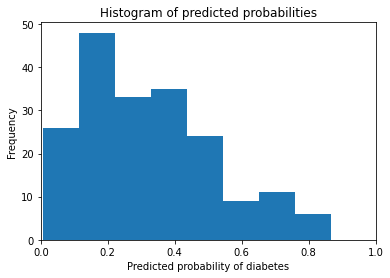

In [55]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [56]:
# in this we basically lower the point of determining whether the given person will be classifiesd as a diabetic or not 

# Decrease the threshold for predicting diabetes in order to increase the sensitivity of the classifier

In [59]:
# we can also adjust the specificity of the classifier 

In [60]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_for_the_changed_threshold = binarize([y_pred_prob], threshold=0.3)[0]

In [61]:
y_pred_prob[0:10]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [62]:
# print the first 10 predicted classes with the lower threshold
y_pred_for_the_changed_threshold[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [63]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[114  16]
 [ 46  16]]


In [67]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(Y_test, y_pred))
# here we can see that the FN has dropped down from 47 to 17  aand TP has also gone up 16-45
# altough the FP has also increased though 
# Now it will predict 1 more often

[[82 48]
 [17 45]]


In [69]:
print(45/float(45+16)) # senstivity (recall)

0.7377049180327869


In [70]:
print(82/float(80+50))  # specificity 

0.6307692307692307


In [71]:
#Conclusion:

#Confusion matrix gives you a more complete picture of how your classifier is performing
#Also allows you to compute various classification metrics, and these metrics can guide your model
#selection

In [ ]:
# this should be the last step in our ML journey first we should always bang our head around building better 
# ML models 